## Práctica 0: Introducción a Python
### Cálculo de una integral definida mendiante el algoritmo de Monte Carlo

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

In [6]:
# Imports que vamos a utilizar
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [7]:
# Función que devuelve el cuadrado
def funcion_cuadrado(x):
    return x*x

In [8]:
# Si a = 1 y b = 3
def funcion_parabola(x):
    return (4*x - (x*x))

In [9]:
# Función que devuelve el seno
def funcion_seno(x):
    return np.sin(x) 

### Versión iterativa
Parámetros:
- fun: función que queremos integrar
- a y b: puntos para los que calculamos la integral
- num_puntos: número de puntos aleatorios que se van a generar
- pintar: booleano que indica si queremos o no pintar la gráfica con la función y los puntos

In [10]:
# Versión iterativa

def integra_mc(fun, a, b, num_puntos=10000, pintar=False):
    
    # Utilizando la función linspace, creamos num_puntos equidistantes entre a y b
    eje_x = np.linspace(a, b, num_puntos)
    
    # Calculamos el valor de la función fun para dichos puntos
    eje_y = fun(eje_x)
    
    # Calculamos los valores máximo y mínimo aproximados
    max_f = max(eje_y)
    min_f = min(eje_y)
    
    # Variable para guardar el número de puntos
    debajo = 0
    
    # Listas con los puntos aleatorios (coordenadas x e y)
    aleatorio_x = []
    aleatorio_y = []
    
    for i in range(num_puntos):
        
        # Se genera un valor aleatorio entre a y b, que representa un valor del eje x
        x = np.random.uniform(a, b)
        
        # Se genera un valor aleatorio entre el máximo y el mínimo, que representa un valor del eje y
        y = np.random.uniform(min_f, max_f)
        
        # Guardamos el punto calculado
        aleatorio_x.append(x)
        aleatorio_y.append(y)
        
        # Si está debajo de la función, lo añadimos al contador
        if(fun(x)) > y:
            debajo += 1
    
    # Cáculo del valor de la integral
    valor_integral = (debajo/num_puntos) * (b - a) * max_f
    
    # Para pintar la gráfica o no (si estamos midiendo puntos)
    if(pintar):
        plt.plot(eje_x, eje_y)
        plt.scatter(aleatorio_x, aleatorio_y, color = 'red', marker = 'x')
    
    return valor_integral

### Versión vectorizada

Parámetros:
- fun: función que queremos integrar
- a y b: puntos para los que calculamos la integral
- num_puntos: número de puntos aleatorios que se van a generar
- pintar: booleano que indica si queremos o no pintar la gráfica con la función y los puntos

In [11]:
# Versión vectorizada

def integra_mc_fast(fun, a, b, num_puntos=10000, pintar=False):
    
    # Utilizando la función linspace, creamos num_puntos equidistantes entre a y b
    eje_x = np.linspace(a, b, num_puntos)
    
    # Calculamos el valor de la función fun para dichos puntos
    eje_y = fun(eje_x)
    
    # Calculamos los valores máximo y mínimo aproximados
    max_f = np.max(eje_y)
    min_f = np.min(eje_y)
    
    # Variable para guardar el número de puntos
    debajo = 0
    
    # Cálculo de puntos aleatorios de forma vectorizada
    aleatorio_x = np.random.uniform(a, b, num_puntos)
    aleatorio_y = np.random.uniform(min_f, max_f, num_puntos)
    
    # Cálculo del número de puntos que hay debajo de forma vectorizada
    debajo = np.sum(fun(aleatorio_x) > aleatorio_y)
    
    # Cáculo del valor de la integral
    valor_integral = (debajo/num_puntos) * (b - a) * max_f
    
    # Para pintar la gráfica o no (si estamos midiendo puntos)
    if(pintar):
        plt.plot(eje_x, eje_y)
        plt.scatter(aleatorio_x, aleatorio_y, color = 'red', marker = 'x')
    
    return valor_integral

#### Ejemplo de funcionamiento para la función seno entre 0 y pi

In [12]:
# Cálculo utilizando bibliotecas
integrate.quad(funcion_seno, 0, np.pi) 

(2.0, 2.220446049250313e-14)

2.010366216969439

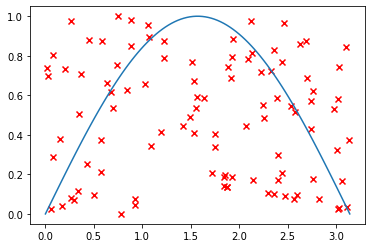

In [21]:
# Cálculo versión iterativa
integra_mc(funcion_seno, 0, np.pi, 100, True)

2.0731901612497343

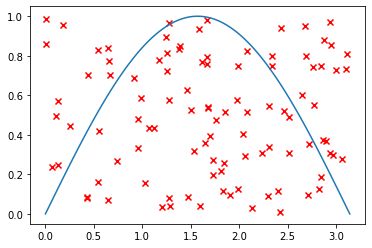

In [20]:
# Cálculo versión vectorizada
integra_mc_fast(funcion_seno, 0, np.pi, 100, True)

Como vemos, ambas versiónes nos devuelven un cálculo aproximado utilizando únicamente 100 puntos. Como depende de la aleatoriedad, es posible que en
otras ejecuciones no sea tan acertado.

### Comparación de tiempos entre ambos métodos
Parámetros:
- fun: función que queremos integrar
- a y b: puntos para los que calculamos la integral
- puntos_ini y puntos_fin: rango de generación de puntos
- num_calculos: número de pruebas que vamos a realizar

In [24]:
# Comparamos los tiempos para integrar la función fun entre a y b
def compara_tiempos_dot(fun, a, b, puntos_ini=100, puntos_fin=100000, num_calculos=20):
    
    # Generamos num_calculos tamaños distintos entre puntos_ini y puntos_fin puntos
    sizes = np.linspace(puntos_ini, puntos_fin, num_calculos)
    
    # Listas donde guardamos los tiempos
    times_dot = []
    times_fast_dot = []
    
    for size in sizes:
        
        # Calculamos el tiempo de la versión iterativa
        tic = time.process_time()
        dot = integra_mc(fun, a, b, int(size))
        toc = time.process_time()
        times_dot += [1000 * (toc - tic)]
        
        # Calculamos el tiempo de la versión vectorizada
        tic = time.process_time()
        fast_dot = integra_mc_fast(fun, a, b, int (size))
        toc = time.process_time()
        times_fast_dot += [1000 * (toc - tic)]
    
    # Pintamos el resultado
    plt.figure()
    plt.scatter(sizes, times_dot, c='red', label='bucle')
    plt.scatter(sizes, times_fast_dot, c='blue', label='vector')
    plt.legend()
    plt.savefig('compara tiempos dot.png')

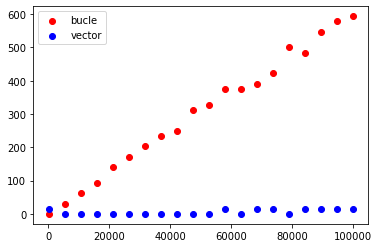

In [25]:
compara_tiempos_dot(funcion_seno, 0, np.pi)

Probando desde 100 a 100000 puntos, mientras que en la versión iterativa utilizando un bucle si aumentas el número de elementos, aumenta el tiempo, en la versión vectorizada se mantiene claramente el tiempo. Habíamos considerado añadir más puntos, pero resulta evidente que con 100000 puntos, la versión del bucle es exponencial, mientras que la vectorizada es constante.